In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:\programowanie\python_mrowa\wdfcs\zad2_bat_1.txt', sep='\t', header=1, names=['t', 'V'])
df = df.replace(',', '.', regex=True)
df['t'] = df['t'].astype(float)
df['V'] = df['V'].astype(float)
print(df.head())
print(df.dtypes)

      t      V
0   6.0  3.640
1  18.0  3.634
2  33.0  3.629
3  52.0  3.624
4  71.0  3.619
t    float64
V    float64
dtype: object


In [35]:
I = 8.89 * 10**(-6)
m = 2.25 * 10**(-3)

df['Q'] = (df['t'] * I) / (m * 3600) * 1000
print(df.tail())

            t      V           Q          dQ
615  356702.0  1.519  391.491454 -225.582503
616  357457.0  1.514  392.320090 -219.593587
617  358182.0  1.509  393.115800 -215.488256
618  358937.0  1.504  393.944436 -211.804696
619  359444.0  1.500  394.500884 -207.703065


Text(0.5, 1.0, 'Krzywa rozładowania baterii')

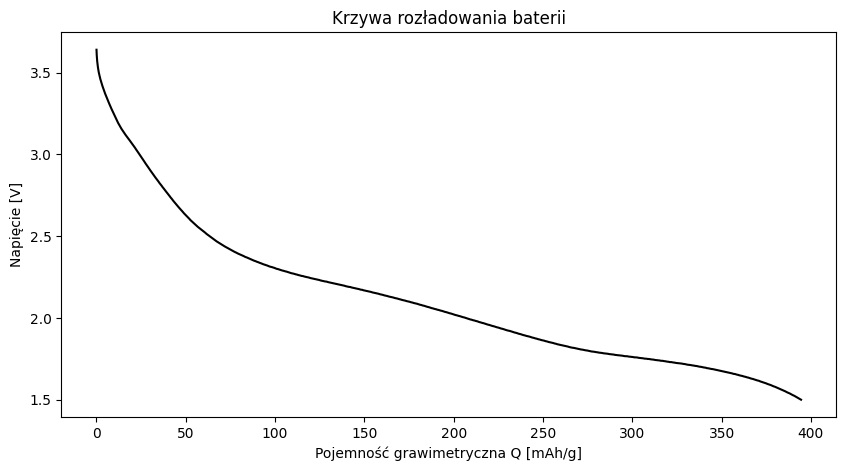

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Q'], df['V'], color='black', linestyle='solid', label='Q(U)')
ax.set_xlabel('Pojemność grawimetryczna Q [mAh/g]')
ax.set_ylabel('Napięcie [V]')
ax.set_title('Krzywa rozładowania baterii')

Text(2.289, -400.9351055356444, '$U_2=2.189$V')

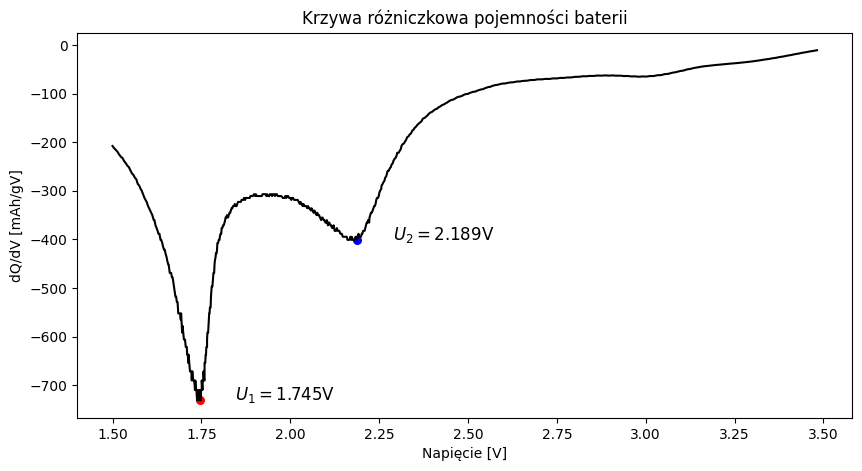

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

df['dQ'] = df['Q'].diff(30) / df['V'].diff(30)
ax.plot(df['V'], df['dQ'], color='black', linestyle='solid', label='dQ/dU')
ax.set_xlabel('Napięcie [V]')
ax.set_ylabel('dQ/dV [mAh/gV]')
ax.set_title('Krzywa różniczkowa pojemności baterii')

min1_index = df['dQ'].argmin()
min1_V = df.iloc[min1_index]['V']
min1_dQ = df.iloc[min1_index]['dQ']

df2 = df[df['V'] > 2]
min2_index = df2['dQ'].argmin()
min2_V = df2.iloc[min2_index]['V']
min2_dQ = df2.iloc[min2_index]['dQ']

ax.scatter(min1_V, min1_dQ, color='red', marker='o', s=30, label=f'$U_1={min1_V}$')
ax.annotate(f'$U_1={min1_V}$V', xy=(min1_V, min1_dQ), xytext=(min1_V+0.1, min1_dQ), fontsize=12)

ax.scatter(min2_V, min2_dQ, color='blue', marker='o', s=30, label=f'$U_2={min2_V}$')
ax.annotate(f'$U_2={min2_V}$V', xy=(min2_V, min2_dQ), xytext=(min2_V+0.1, min2_dQ), fontsize=12)


In [41]:
Qt = (1.6 * 6.02 * 10**(4) * 3 * 0.9) / ((2*51 + 5*16)*0.9 + 0.1*(3*16+2*10.8)) / 3600 * 1000
Qt

423.0498945888967

In [45]:
df['Q'].tail(1).values[0]/Qt

0.9325162090726382

In [50]:
from scipy import integrate

V_integral = integrate.trapezoid(df['V'], df['t'])
V_integral/df['t'].tail(1).values[0]

2.1120245253780836